
Chapter 2: Your first remote sensing vegetation index
=====================================================

## Read Data

In [2]:
# Import the Python 3 print function
from __future__ import print_function

# Import the "gdal" and "gdal_array" submodules from within the "osgeo" module
from osgeo import gdal
from osgeo import gdal_array

# Import the NumPy module
import numpy as np

# Open a GDAL dataset
dataset = gdal.Open('../../example/LE70220491999322EDC01_stack.gtif', gdal.GA_ReadOnly)

# Allocate our array using the first band's datatype
image_datatype = dataset.GetRasterBand(1).DataType

image = np.zeros((dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount),
                 dtype=gdal_array.GDALTypeCodeToNumericTypeCode(image_datatype))

# Loop over all bands in dataset
for b in range(dataset.RasterCount):
    # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band = dataset.GetRasterBand(b + 1)
    
    # Read in the band's data into the third dimension of our array
    image[:, :, b] = band.ReadAsArray()
    

print('Red band mean: {r}'.format(r=image[:, :, 2].mean()))
print('NIR band mean: {nir}'.format(nir=image[:, :, 3].mean()))

Red band mean: 589.379808
NIR band mean: 3442.297712



##  Calculate NDVI

In [3]:
b_red = 2
b_nir = 3

ndvi = (image[:, :, b_nir] - image[:, :, b_red]) / (image[:, :, b_red] + image[:, :, b_nir])

print(ndvi)
print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('Mean NDVI: {m}'.format(m=ndvi.mean()))
print('Median NDVI: {m}'.format(m=np.median(ndvi)))
print('Min NDVI: {m}'.format(m=ndvi.min()))

[[0.71390828 0.71079741 0.69352291 ... 0.79392185 0.81408451 0.79165379]
 [0.68064263 0.6787194  0.6643924  ... 0.81387182 0.79880597 0.77389811]
 [0.66904762 0.67268446 0.66332892 ... 0.78495923 0.78278801 0.81253291]
 ...
 [0.68301262 0.68593651 0.67145614 ... 0.81065089 0.78050922 0.76519266]
 [0.67341718 0.6622986  0.65331611 ... 0.80436681 0.77483099 0.75      ]
 [0.63973799 0.62396514 0.66731813 ... 0.7094648  0.70005244 0.74574523]]

Max NDVI: 0.9046013008913515
Mean NDVI: 0.7088133953809207
Median NDVI: 0.7319195214790647
Min NDVI: 0.09470304975922954


## Visualise Data

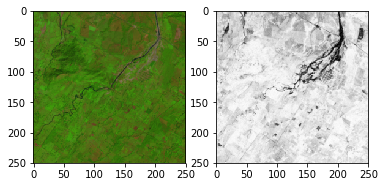

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Extract reference to SWIR1, NIR, and Red bands
index = np.array([4, 3, 2])
colors = image[:, :, index].astype(np.float64)

max_val = 8000
min_val = 0

# Enforce maximum and minimum values
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[2]):
    colors[:, :, b] = colors[:, :, b] * 1 / (max_val - min_val)

plt.subplot(121)
plt.imshow(colors)

# Show NDVI
plt.subplot(122)
plt.imshow(ndvi, cmap=plt.cm.Greys_r)